In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mplfinance

import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime
import time


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
def analyze_stock_trend(symbol, start_date, end_date, api_key):
  # requests API from Alpha Vantage for daily data
  url = f"https://www.alphavantage.co/query"
  params = {
      "function": "TIME_SERIES_DAILY",
      "symbol": symbol,
      "outputsize": "full",
      "apikey": api_key
  }

  print(f"\nFetching data for {symbol}...")
  response = requests.get(url, params=params)
  data = response.json()

  # handles errors
  if "Time Series (Daily)" not in data:
    print(f"Error fetching data: {data.get('Note', data)}")
    return None

  # API response is converted into a dataframe
  df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient='index')
  df = df.rename(columns={
      "1. open": "Open",
      "2. high": "High",
      "3. low": "Low",
      "4. close": "Close",
      "5. volume": "Volume"
  })
  df.index = pd.to_datetime(df.index)
  df = df.sort_index()

  print(f"Data available from {df.index.min().date()} to {df.index.max().date()}")

  # filters data based on user input
  mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
  df_filtered = df.loc[mask].copy()

  if df_filtered.empty:
      print(f"No data between {start_date} and {end_date}")
      return None

  df_filtered[["Open", "High", "Low", "Close"]] = df_filtered[["Open", "High", "Low", "Close"]].astype(float)
  df_filtered["Trend_Label"] = df_filtered.apply(
      lambda row: "Bullish" if row["Close"] > row["Open"] else "Bearish", axis=1
  )

  return df_filtered

In [ ]:
api_key = "CWR4QR07SJ1EWE96"

# gets user input
symbol = input("Enter stock symbol (e.g., AAPL): ").upper()
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

df_filtered = analyze_stock_trend(symbol, start_date, end_date, api_key)

Enter stock symbol (e.g., AAPL): AAPL
Enter start date (YYYY-MM-DD): 2020-01-01
Enter end date (YYYY-MM-DD): 2020-02-01

Fetching data for AAPL...
Data available from 1999-11-01 to 2025-04-11


In [ ]:
if df_filtered is not None:
  # calculates minimum, maximum, average prices from selected range
  lowest_price = df_filtered["Low"].min()
  highest_price = df_filtered["High"].max()
  average_price = df_filtered["Close"].mean()

  # bullish days counted where close > open
  total_bullish = (df_filtered["Trend_Label"] == "Bullish").sum()

  # bearish days counted where close <= open
  total_bearish = (df_filtered["Trend_Label"] == "Bearish").sum()

  # determines the major trend based on totals
  majority_trend = "Bullish" if total_bullish > total_bearish else "Bearish"

  # displays statistics
  print(f"\n{symbol} from {start_date} to {end_date}")
  print(f"Lowest Price: ${lowest_price:.2f}")
  print(f"Highest Price: ${highest_price:.2f}")
  print(f"Average Close: ${average_price:.2f}")
  print(f"Overall Trend: {majority_trend} ({total_bullish} Bullish vs {total_bearish} Bearish Days)")
  print("\nDaily Trends:")
  print(df_filtered[["Open", "Close", "Trend_Label"]])



AAPL from 2020-01-01 to 2020-02-01
Lowest Price: $292.75
Highest Price: $327.85
Average Close: $311.92
Overall Trend: Bullish (11 Bullish vs 10 Bearish Days)

Daily Trends:
              Open   Close Trend_Label
2020-01-02  296.24  300.35     Bullish
2020-01-03  297.15  297.43     Bullish
2020-01-06  293.79  299.80     Bullish
2020-01-07  299.84  298.39     Bearish
2020-01-08  297.16  303.19     Bullish
2020-01-09  307.24  309.63     Bullish
2020-01-10  310.60  310.33     Bearish
2020-01-13  311.64  316.96     Bullish
2020-01-14  316.70  312.68     Bearish
2020-01-15  311.85  311.34     Bearish
2020-01-16  313.59  315.24     Bullish
2020-01-17  316.27  318.73     Bullish
2020-01-21  317.19  316.57     Bearish
2020-01-22  318.58  317.70     Bearish
2020-01-23  317.92  319.23     Bullish
2020-01-24  320.25  318.31     Bearish
2020-01-27  310.06  308.95     Bearish
2020-01-28  312.60  317.69     Bullish
2020-01-29  324.45  324.34     Bearish
2020-01-30  320.54  323.87     Bullish
2020-01

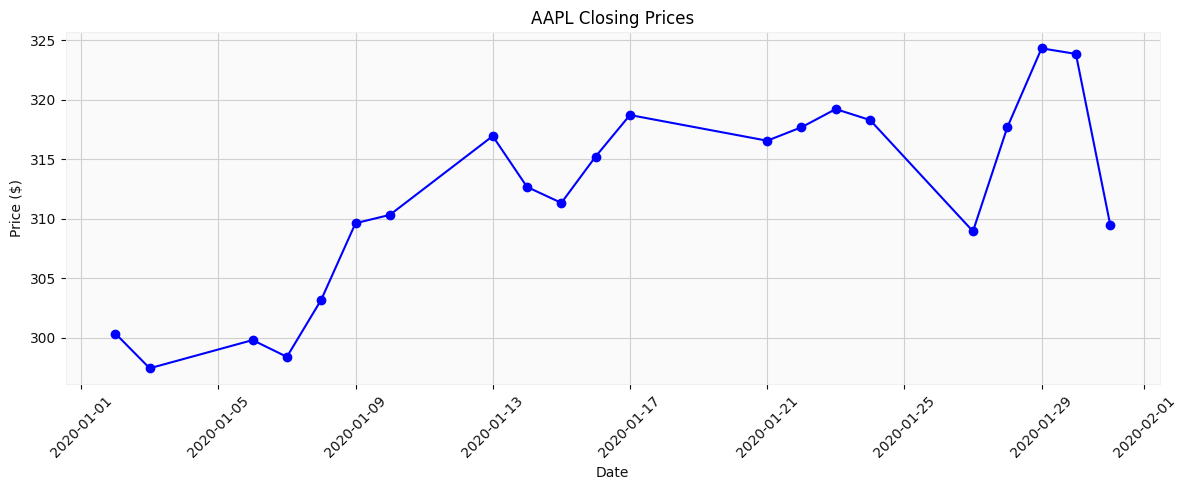

In [ ]:
# displays line chart to show stock price movement over time
if df_filtered is not None:
  plt.figure(figsize=(12, 5))
  plt.plot(df_filtered.index, df_filtered["Close"], marker='o', linestyle='-', color='blue')
  plt.title(f"{symbol} Closing Prices")
  plt.xlabel("Date")
  plt.ylabel("Price ($)")
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


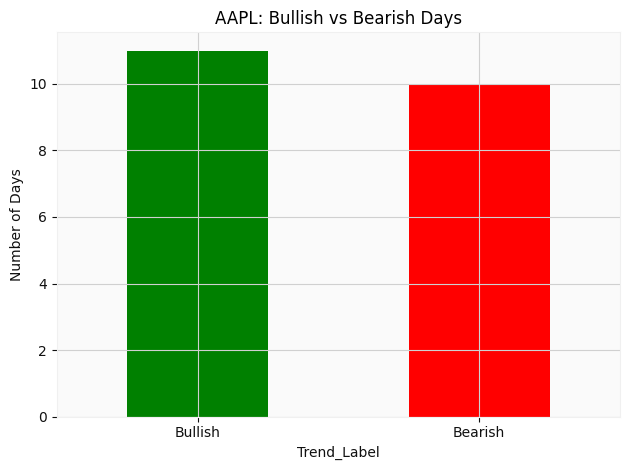

In [ ]:
# here we plot amount of bullish and bearish days for chosen stock
if df_filtered is not None:
  df_filtered["Trend_Label"].value_counts().plot(kind='bar', color=["green", "red"])
  plt.title(f"{symbol}: Bullish vs Bearish Days")
  plt.ylabel("Number of Days")
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.grid(True)
  plt.show()


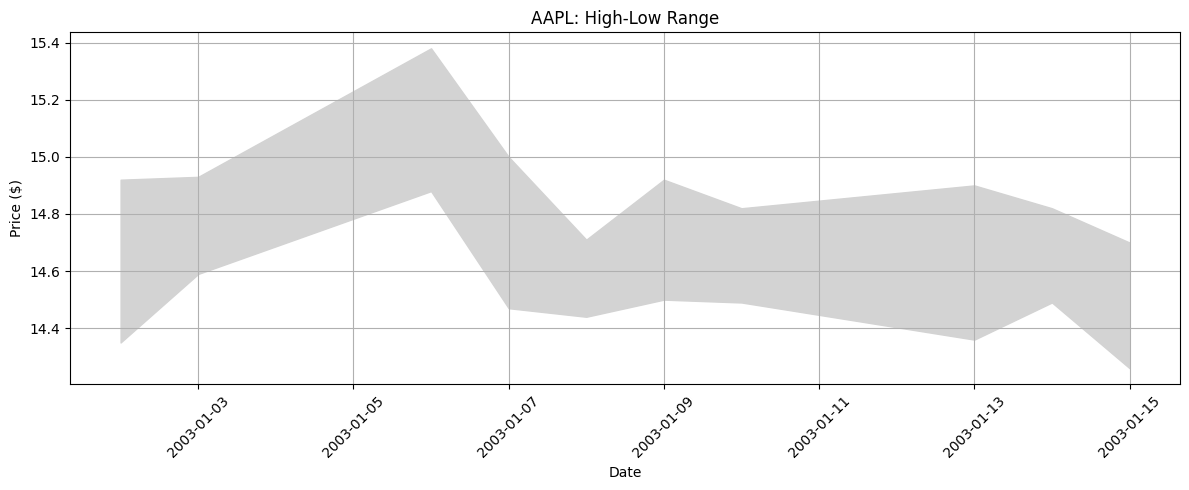

In [ ]:
# this displays range between daily high and low prices
if df_filtered is not None:
    plt.figure(figsize=(12, 5))
    plt.fill_between(df_filtered.index, df_filtered["Low"], df_filtered["High"], color='lightgray')
    plt.title(f"{symbol}: High-Low Range")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

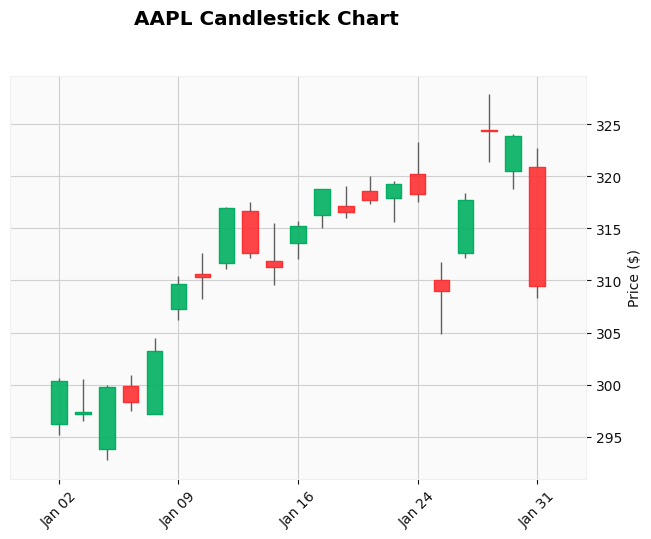

In [ ]:
# displays candlestick chart for chosen stock
if df_filtered is not None:
    df_candle = df_filtered[["Open", "High", "Low", "Close"]].copy()
    mpf.plot(df_candle, type='candle', style='yahoo', title=f"{symbol} Candlestick Chart", ylabel='Price ($)', volume=False)

## **At least five visualizations**

***(that shows an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to Investigate. Write the name of the member(s) who is responsible for each of them while explaining it.)***

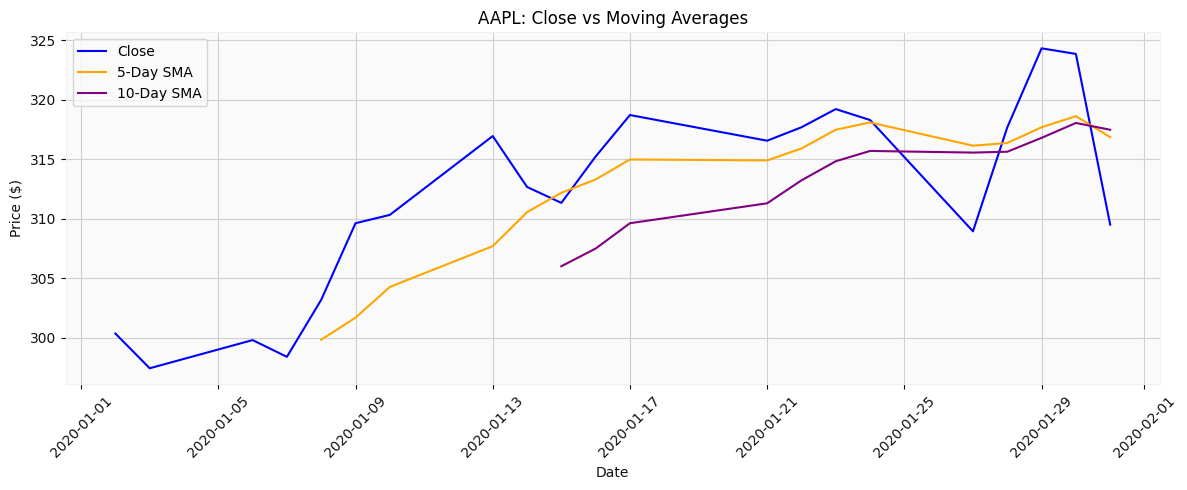

In [ ]:
# Member: Dipesh Limbachiya

#Hypothesis: A short-term moving average (5-day) crossing above a longer-term average (10-day) is a reliable early indicator of a bullish price movement in a stock.
# Why I think its a good hypothesis: It's based on a well-known trading strategy: the Golden Cross. Actual AAPL chart shows this crossover happened, and the price rose
# afterward. It's testable: we can observed a crossover and checked the price behavior after. I just wanted to give an example with one stock, so I chose everyone's favorite, Ap

#Explanation:
# We investigated whether a short-term moving average crossing above a longer-term one signals a bullish trend. In our visualization of AAPL from early 2020, we observed
# the 5-day SMA crossing above the 10-day SMA around mid-January. Shortly after, AAPL’s closing price continued to rise, supporting the hypothesis. This pattern, known as
# a golden cross, is often used in technical analysis, and our data supports its validity during this period.

if df_filtered is not None:
    df_filtered["SMA_5"] = df_filtered["Close"].rolling(window=5).mean()
    df_filtered["SMA_10"] = df_filtered["Close"].rolling(window=10).mean()

    plt.figure(figsize=(12, 5))
    plt.plot(df_filtered.index, df_filtered["Close"], label="Close", color='blue')
    plt.plot(df_filtered.index, df_filtered["SMA_5"], label="5-Day SMA", color='orange')
    plt.plot(df_filtered.index, df_filtered["SMA_10"], label="10-Day SMA", color='purple')
    plt.title(f"{symbol}: Close vs Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Fetching data for AAPL...
Fetching data for GOOGL...
Fetching data for MSFT...
Fetching data for AMZN...
Fetching data for TSLA...


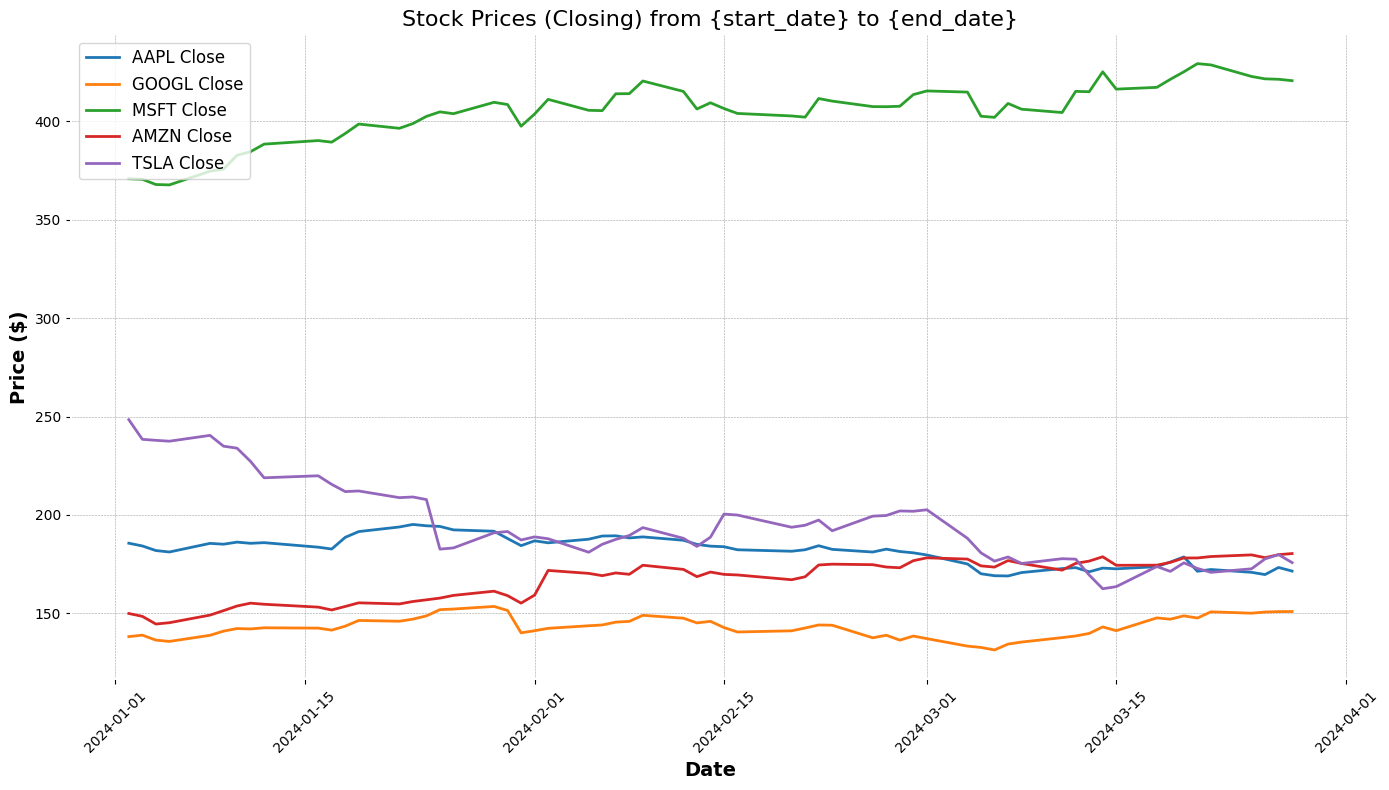

In [ ]:
#Member: Parth

#Hypothesis: The hypotheses aim to explore how stock price movement and volatility are
#            related to market trends (bullish or bearish), helping investors and analysts
#            make informed decisions based on historical data.


# Function to fetch stock data from Alpha Vantage API
def fetch_stock_data(symbol, api_key, start_date, end_date):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",  # Fetch full data
        "apikey": api_key
    }
    response = requests.get(url, params=params)
    data = response.json()

    # Check for errors in the API response
    if "Time Series (Daily)" not in data:
        print(f"Error fetching data for {symbol}: {data.get('Note', 'No data found.')}")
        return None

    # Convert the data into a pandas DataFrame
    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient='index')
    df = df.rename(columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "4. close": "Close",
        "5. volume": "Volume"
    })
    df.index = pd.to_datetime(df.index)  # Convert index to datetime
    df = df.sort_index()  # Sort by date

    # Ensure that columns are numeric (to avoid type issues)
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')

    # Filter data by the date range
    mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
    df_filtered = df.loc[mask]

    # Handle any rows with missing data (NaN) by dropping them
    df_filtered = df_filtered.dropna()

    return df_filtered

# Plot stock price movement as lines
def plot_stock_prices_line(tickers, start_date, end_date, api_key):
    """
    Plot stock prices as lines for multiple tickers.
    :param tickers: List of stock symbols
    :param start_date: Start date for data (YYYY-MM-DD)
    :param end_date: End date for data (YYYY-MM-DD)
    :param api_key: Your Alpha Vantage API key
    """
    plt.figure(figsize=(14, 8))  # Set figure size

    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        df = fetch_stock_data(ticker, api_key, start_date, end_date)

        if df is not None:
            # Plot stock's Close price as a line
            plt.plot(df.index, df['Close'], label=f"{ticker} Close", linewidth=2)
        else:
            print(f"Skipping {ticker} due to missing data.")

    # Adding labels and title
    plt.title("Stock Prices (Closing) from {start_date} to {end_date}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Price ($)", fontsize=14)
    plt.legend(loc="upper left", fontsize=12)
    plt.grid(True)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    plt.tight_layout()  # Improve layout
    plt.show()

# Example: Using the functions with actual data
api_key = "USN9XTYS7JXVC2NM"  # Replace with your actual API key
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]  # List of stock tickers to analyze
start_date = "2024-01-01"  # Start date for analysis
end_date = "2024-03-31"    # End date for analysis

# Run the function to plot stock prices as lines
plot_stock_prices_line(tickers, start_date, end_date, api_key)

#The chart shows the closing prices of the selected stocks (e.g., AAPL, GOOGL, MSFT, etc.)
#over the date range from January 1, 2024, to March 31, 2024.
#X-axis: Represents the date range over which the stock prices are tracked.
#Y-axis: Shows the closing price of the stock in US dollars for each day.
#Lines: Each stock is represented by a line showing how its price changes over time. The steeper the slope, the more volatility (price fluctuation) that stock experienced on those days.

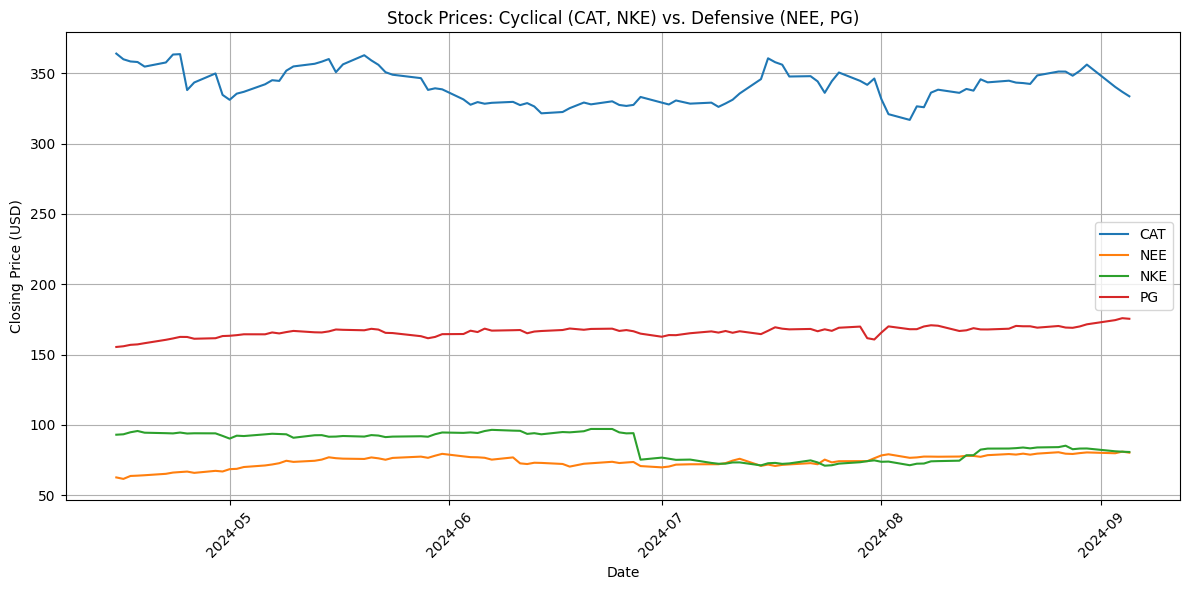

In [ ]:
#Data visual 2: Rithika

#Hypothesis: Stocks in cyclical sectors such as industrials and consumer discretionary outperform during bull markets,
#while defensive sectors like utilities and basic consumer goods provide more stability during bear markets-
#suggesting performance is driven more by economic sensitivity than sector classification alone.


import requests
import pandas as pd
import matplotlib.pyplot as plt

#API key
API_KEY = '35cac7ac68cf8967e3bc229248a1cfc5'

# Company symbols
symbols = 'CAT,NKE,NEE,PG'

# API endpoint and parameters
url = 'http://api.marketstack.com/v1/eod'
params = {
    'access_key': API_KEY,
    'symbols': symbols,
    'limit': 400,   # 100 per company (approx)
    'sort': 'ASC'
}

# Request data from Marketstack
response = requests.get(url, params=params)
data = response.json()['data']

# Convert to dataframe
df = pd.DataFrame(data)

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Pivot: Dates as index, symbols as columns, close prices as values
pivot_df = df.pivot(index='date', columns='symbol', values='close').sort_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
for symbol in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[symbol], label=symbol)

plt.title('Stock Prices: Cyclical (CAT, NKE) vs. Defensive (NEE, PG)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Explanation:
#This chart compares the stock performance of two cyclical companies (CAT, NKE) and two defensive companies (NEE, PG) from April to September 2024.
#The data shows that Caterpillar (CAT) and Nike (NKE), representing cyclical sectors, experienced more noticeable fluctuations in their stock prices—especially CAT, which showed significant volatility.
#However, NextEra Energy (NEE) and Procter & Gamble (PG), representing defensive sectors, maintained relatively stable price trends, with fewer sharp drops or spikes.
#These trends support the hypothesis that cyclical stocks are more responsive to market conditions, performing better in bull markets but facing sharper declines in downturns, while defensive stocks offer greater stability, regardless of economic cycles.



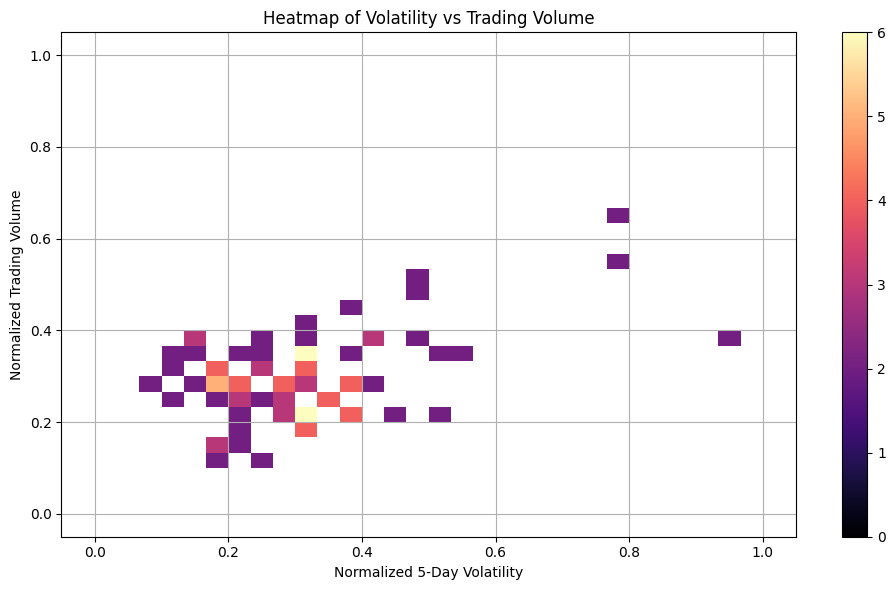

In [ ]:
# Member: Garima

# Hypothesis:
# We hypothesize that there is a positive correlation between the
# short-run price volatility of a stock and its volume. Specifically, when the
# price of a stock exhibits price movements over 5 sequential days, it will
# attract more attention from the market and consequently generate more volume.
# This is an assumption made on the premise that institutional and retail investors
# are more likely to move more forcefully during periods of uncertainty or news-based periods, causing volume spikes.
# With the investigation of this relationship using a heatmap, we aim to see whether this behavior consistently appears in previous trading patterns.

# Explanation:
# This heatmap shows the correlation between normalized 5-day price volatility and normalized trading volume for AAPL stock in 2022.
# The densest regions of the plot are in the lower volatility and moderate volume category, indicating that most trading days have relatively stable price action with moderate trading.
# While there are a few cases of high volatility accompanied by corresponding high volume, distribution as a whole shows only a weak positive relationship.
# This lends support to our hypothesis to some degree that more volatility will be accompanied by more trading activity but also shows that volume is influenced by more advanced market mechanisms than basic price fluctuations.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests


def analyze_stock_trend(symbol, start_date, end_date, api_key):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",
        "apikey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print("API error or limit reached")
        return None

    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index", dtype=float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.columns = ["Open", "High", "Low", "Close", "Volume"]

    # Filter by date
    df = df[(df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))]
    return df

# Fetch the stock data
df_filtered = analyze_stock_trend("AAPL", "2022-01-01", "2022-12-31", "35cac7ac68cf8967e3bc229248a1cfc5")

# Proceed if data is valid
if df_filtered is not None:
    #  Assign to df
    df = df_filtered.copy()

    # Calculate daily return and 5-day rolling volatility
    df['Daily Return'] = df['Close'].pct_change()
    df['Volatility (5D)'] = df['Daily Return'].rolling(window=5).std()

    # Drop NA values
    df.dropna(subset=['Volatility (5D)', 'Volume'], inplace=True)

    # Normalize for heatmap
    df['Volatility Norm'] = (df['Volatility (5D)'] - df['Volatility (5D)'].min()) / (df['Volatility (5D)'].max() - df['Volatility (5D)'].min())
    df['Volume Norm'] = (df['Volume'] - df['Volume'].min()) / (df['Volume'].max() - df['Volume'].min())

    # Create the heatmap
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df, x='Volatility Norm', y='Volume Norm',
        bins=30, pthresh=0.01, cmap='magma', cbar=True
    )
    plt.title('Heatmap of Volatility vs Trading Volume')
    plt.xlabel('Normalized 5-Day Volatility')
    plt.ylabel('Normalized Trading Volume')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


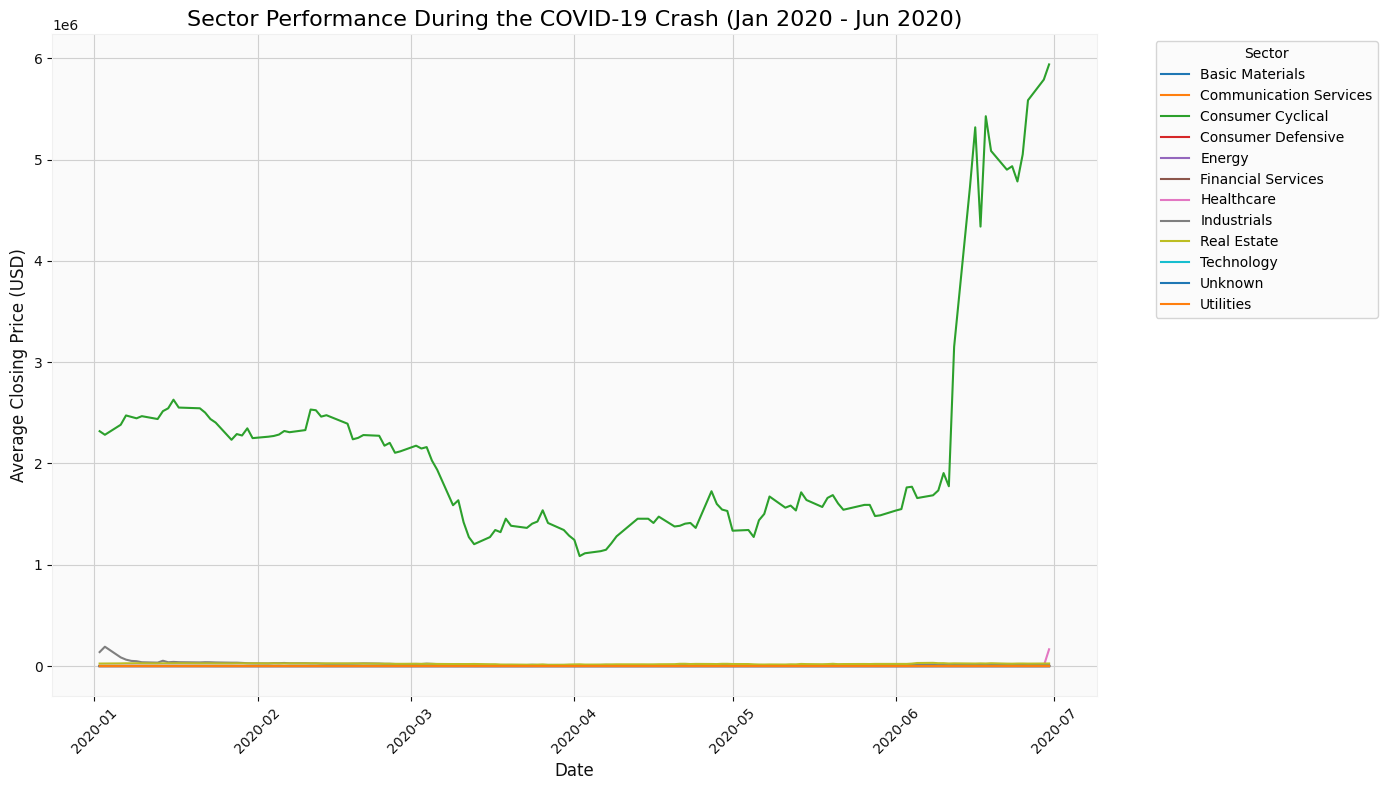

In [ ]:
# Member: Helly

# Hypothesis: Sectors like healthcare and consumer services may show stronger recovery in stock prices compared to others
# during early COVID-19 from January 2020 to June 2020.

# Explanation: This visual aims to show average daily closing prices around early COVID-19 period. This is an interesting
# hypothesis because it can help indicate trends for how sectors perform during world-wide crisis like COVID-19. Exploring
# this may help people prepare for future circumstances with similar situations. It can be seen that the consumer cyclical
# sector spiked signicantly during this time. This may be due to sudden consumer behavior shifts, e-commerce popularity and
# government stimulus effects.

import matplotlib.pyplot as plt

price_df = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/all_nasdaq_data.csv', low_memory=False)

price_df = price_df[price_df['Price'] != 'Ticker']
price_df = price_df[price_df['Price'] != 'Date']
price_df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']
price_df.dropna(inplace=True)
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df[['Close', 'High', 'Low', 'Open']] = price_df[['Close', 'High', 'Low', 'Open']].astype(float)

sector_df = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/sector_info.csv')
sector_df = sector_df.dropna(subset=['Ticker', 'Sector'])

# merges sector info into price data
df_merged = price_df.merge(sector_df, on='Ticker', how='left')

df_merged_filtered = df_merged[(df_merged['Date'] >= '2020-01-01') & (df_merged['Date'] <= '2020-06-30')]

# calculates daily average closing price for each sector
sector_avg_price = df_merged_filtered.groupby(['Date', 'Sector'])['Close'].mean().reset_index()

# creates a line plot for each sector's average price
plt.figure(figsize=(14, 8))

# plot average closing price for each sector
for sector in sector_avg_price['Sector'].unique():
    sector_data = sector_avg_price[sector_avg_price['Sector'] == sector]
    plt.plot(sector_data['Date'], sector_data['Close'], label=sector)

# displays the plot
plt.title('Sector Performance During the COVID-19 Crash (Jan 2020 - Jun 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Closing Price (USD)', fontsize=12)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Project Introduction:**

Project Bull Vs. Bear aims to identify the performance of different sectors under bullish and bearish market conditions through historical stock market data analysis. The big question in the investigation is: Are we able to predict the performance of industries under bull vs. bear conditions? This analysis has the potential to help minimize risks and boost returns in the market through the resources based on expected market conditions.

## **Any changes since the proposal:**

The project's scope has remained consistent for most factors since the proposal. We haven't removed any aspect of the project from the proposal. However, we have made the following minor changes through addition. The data exploration has expanded from the historical datasets to additional data from recent years. This addition allows us to better analyze trends and improve focus on model interpretability for the future.

## **Data:**

We worked with various datasets for this exploration to obtain a wide variety of data. Datasets obtained from Yahoo finance included NASDAQ stocks as well as sectors. The data was cleaned to ensure that relevant attributes were considered and null values were removed. Trends were determined by using the values to declare bull and bear conditions. We used API generated keys to collect data from multiple sources to ensure a wide range of current data categories.

## **Exploratory data analysis:**


In [ ]:
price_df.head()

,Date,Close,High,Low,Open,Volume,Ticker
2,2020-01-02,1.35,1.38,1.35,1.35,4300,AACG
3,2020-01-03,1.47,1.49,1.36,1.36,42000,AACG
4,2020-01-06,1.43,1.51,1.36,1.51,18700,AACG
5,2020-01-07,1.43,1.44,1.36,1.39,13700,AACG
6,2020-01-08,1.51,1.58,1.36,1.41,90900,AACG


In [ ]:
sector_df.head()

,Ticker,Sector,Industry
0,AACB,Unknown,Unknown
1,AACBR,Unknown,Unknown
2,AACBU,Unknown,Unknown
3,AACG,Consumer Defensive,Education & Training Services
4,AADR,Unknown,Unknown


The historical datasets contain the above attributes. In addition to these, we focused on using API to obtain data from multiple online resources. Those allowed us to explore new ideas with specific research. Some interesting issues we identified were regarding significant outliers in the data and exploring through ML analysis. Some preliminary conclusions we had were that market crash may be more impactful on certain sectors and volatility can be obtained through price range and volume spikes.

## **At least two ML analyses:**


In [ ]:
# Member: Parth, Dipesh, Helly

import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# fetches stock data
def fetch_stock_data(symbol, api_key, start_date, end_date):

    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",
        "apikey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print("Error fetching data. API response:", data)
        return None

    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index", dtype=float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.columns = ["Open", "High", "Low", "Close", "Volume"]
    df = df[["Open", "Close", "Volume"]]

    # filters by date range
    mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
    return df.loc[mask]

# prepares data for training
def prepare_data_for_training(df):
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=14).std()
    df['SMA'] = df['Close'].rolling(window=14).mean()
    df = df.dropna().copy()
    df['Trend'] = (df['Close'] > df['Open']).astype(int)
    X = df[['Return', 'Volatility', 'SMA']]
    y = df['Trend']
    return X, y

# logistic regression training
def logistic_regression_model(X_train, y_train):
    model = LogisticRegression(class_weight='balanced', solver='liblinear')
    model.fit(X_train, y_train)
    return model

# evaluates the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nAccuracy: {(y_pred == y_test).mean():.2f}\n")

# balance with SMOTE
def apply_smote(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    return smote.fit_resample(X_train, y_train)

# runs the full analysis
def run_analysis(df):
    X, y = prepare_data_for_training(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_res, y_train_res = apply_smote(X_train, y_train)
    scaler = StandardScaler()
    X_train_res = scaler.fit_transform(X_train_res)
    X_test = scaler.transform(X_test)
    model = logistic_regression_model(X_train_res, y_train_res)
    evaluate_model(model, X_test, y_test)

api_key = "USN9XTYS7JXVC2NM"
df = fetch_stock_data("AAPL", api_key, "2024-01-01", "2024-03-31")
if df is not None:
    run_analysis(df)
else:
    print("No data found for the given date range.")

# Explanation:
# Stock prediction for bullish and bearish trends is done through logistic regression. Data is used from Alpha Vantage
# for features like volatility, daily returns, and SMA. The target variable imbalance is handled with SMOTE. The 80% accuracy
# shows that the model correctly predicts trends for 80% of days.


Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

Confusion Matrix:
[[5 0]
 [2 3]]

Accuracy: 0.80



In [ ]:
# Member: Garima

# Import necessary libraries
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Function to fetch stock data
def fetch_stock_data(symbol, api_key, start_date, end_date):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",
        "apikey": api_key
    }
    response = requests.get(url, params=params)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print("Error fetching data. API response:", data)
        return None

    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index", dtype=float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.columns = ["Open", "High", "Low", "Close", "Volume"]
    df = df[["Open", "Close", "Volume"]]

    # Filter by date range
    mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
    return df.loc[mask]

# Fetch stock data for AAPL
api_key = "USN9XTYS7JXVC2NM"
df = fetch_stock_data("AAPL", api_key, "2024-01-01", "2024-03-31")

if df is not None:
    # Feature engineering
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=14).std()
    df['SMA'] = df['Close'].rolling(window=14).mean()
    df = df.dropna().copy()
    df['Trend'] = (df['Close'] > df['Open']).astype(int)

    # Define features and target
    X = df[['Return', 'Volatility', 'SMA']]
    y = df['Trend']

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)

    # Evaluate
    print("Classification Report (Random Forest):")
    print(classification_report(y_test, y_pred_rf))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_rf))

else:
    print("No data found for the given date range.")

#Explanation:

# The Random Forest Classifier was used to predict stock market trends—particularly
# analyzing bullish vs bearish conditions based on return, volatility, and simple moving average.
# The model produced balanced performance for this data. In particular, the classification report showed good precision
# and recall for both bullish and bearish trends, showing a moderate accuracy (70 percent) and the confusion matrix reflected a low number of misclassifications.
# This shows that this could be an effective method at analyzing financial data.


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10

Confusion Matrix:
[[5 0]
 [3 2]]


## **Reflection:**

Determining the right data to use from various sources seemed to be a little challenging at first since their is such a wide range available online. As our initial insight, we think that the healthcare and consumer services sectors will exceed others in the bear markets and the technology sector will control bull markets. The ML models show classification of performance across various factors. Going forward, we will continue to explore proposal ideas and try to analyze data to create more efficient predictions. As far as progress, we think we are on the right track, but we need to start deepening the analysis and working on the final report. It is definitely worth proceeding with the project. The initial exploration has solidified our intentions for the project scope and we are excited to see how much more we can obtain from further exploration.

## **Next Steps:**

**Major Milestones:**
- Presentation: (29th April or 1st May)
- Final Project Submission: (5th May)

**Week 1:**
- Finalize exploratory work and findings.
- Obtain final clean and labeled data.
- Evaluate models and compare results.
- Perform further document improvements.

**Week 2:**
- Prepare project work demo.
- Work on the presentation slides and practice presenting.
- Start working on the final project report.

**Week 3:**
- Finalize the project report.
- Ensure there's at least one machine learning or statistical anlaysis techniques per member for data analysis.
- Ensure there at least two visuals per member of final results.
- Thoroughly explain results in the report.